In [1]:
#%load_ext autoreload
#%autoreload 2

In [2]:
from jax.config import config
config.update("jax_enable_x64", True)

In [3]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import moscot
from moscot.problems.time import TemporalProblem
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [29]:
adata = sc.read_h5ad("/lustre/groups/ml01/projects/2022_neural_ot/adata_pancreas_2019_13_14_15.h5ad")

In [30]:
adata.obs

,day,n_counts,log_counts,n_genes,mt_frac,proliferation,G2M_score,S_score,clusters_fig3_final,clusters_fig3_final_noep,clusters_fig4_final,clusters_fig2_final,clusters_fig6_broad_final,clusters_fig6_fine_final,clusters_fig6_alpha_final,celltype
index,,,,,,,,,,,,,,,,
AAACCTGAGGAGTTGC-1-1,13.5,29971.0,10.307985,5282,0.015548,Cycling,0.431102,0.290457,Ngn3 low EP,Prlf. Tip,Ngn3 low EP,EP,Ngn3 low EP,Ngn3 low EP,Ngn3 low EP,Ngn3 low EP
AAACCTGCACCCAGTG-1-1,13.5,28899.0,10.271563,5318,0.032839,Cycling,-0.210975,0.101440,Ngn3 low EP,Tip,Ngn3 low EP,EP,Ngn3 low EP,Ngn3 low EP,Ngn3 low EP,Ngn3 low EP
AAACCTGGTACTCAAC-1-1,13.5,17524.0,9.771327,4349,0.024652,Cycling,-0.014871,0.541209,Prlf. Ductal,Prlf. Ductal,Ductal Bipotent,Ductal,Prlf. Ductal,Ductal,Ductal,Ductal
AAACCTGGTAGCGATG-1-1,13.5,14151.0,9.557541,4477,0.035263,Non-Cycling,-0.212516,-0.200962,Fev+,Fev+,Fev+,Fev+,Fev+,Fev+ Alpha,Fev+ Alpha,Fev+ Alpha
AAACCTGGTCTAAAGA-1-1,13.5,32079.0,10.375957,5327,0.023847,Cycling,0.648927,0.029179,Prlf. Tip,Prlf. Tip,Excluded,Tip,Prlf. Tip,Tip,Tip,Tip
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTTGTTTGG-1-3,15.5,6453.0,8.772301,2471,0.022935,Non-Cycling,-0.208907,-0.045692,Ductal,Ductal,Ductal Bipotent,Ductal,Ductal,Ductal,Ductal,Ductal
TTTGTCATCCTGCAGG-1-3,15.5,28195.0,10.246900,4469,0.012378,Cycling,0.599579,0.252814,Mat. Acinar,Mat. Acinar,Excluded,Acinar,Mat. Acinar,Acinar,NaN,Acinar
TTTGTCATCGAATGCT-1-3,15.5,12690.0,9.448569,3614,0.028290,Non-Cycling,-0.206865,-0.240576,Endocrine,Endocrine,Excluded,Endocrine,Alpha,Alpha,secondary Alpha,Alpha


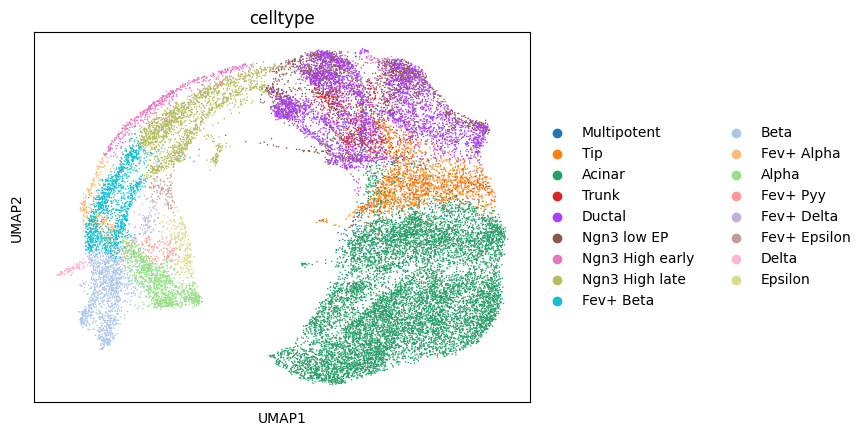

In [67]:
sc.pl.umap(adata, color="celltype")

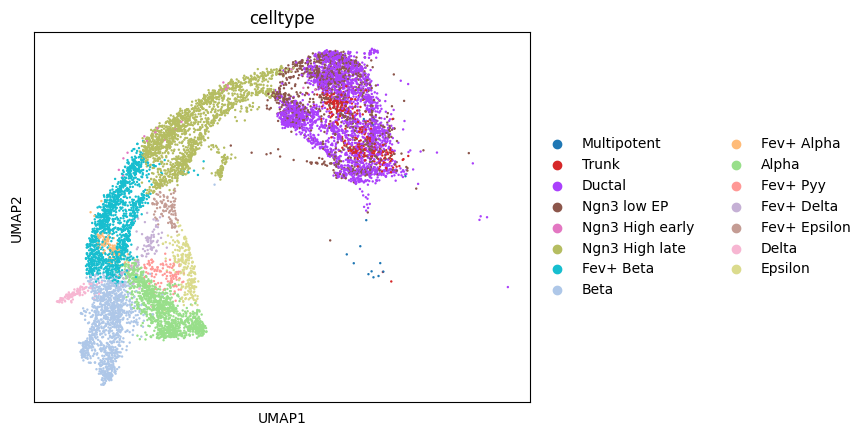

In [68]:
sc.pl.umap(adata_red, color="celltype")

In [74]:
adata_red.obs["day"].value_counts()

14.5    6217
15.5    3750
Name: day, dtype: int64

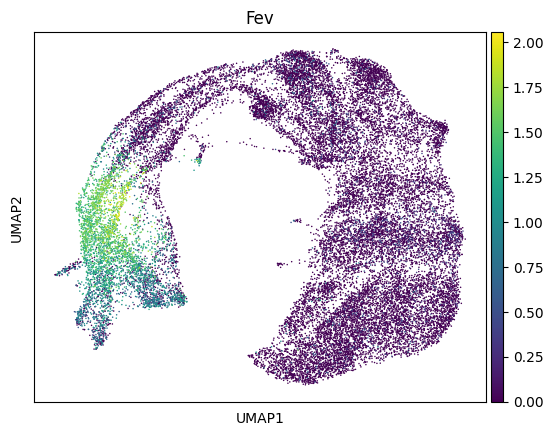

In [75]:
sc.pl.umap(adata, color=["Fev"])

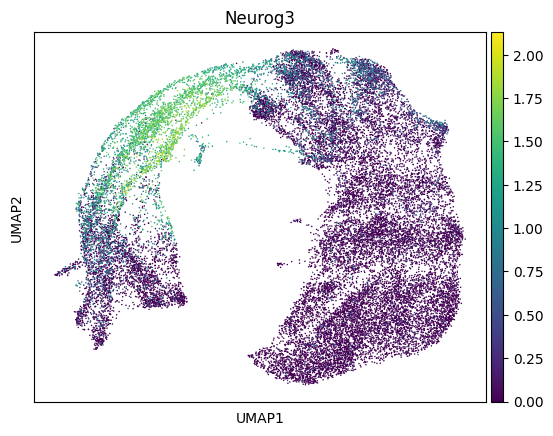

In [77]:
sc.pl.umap(adata, color=["Neurog3"])

In [72]:
adata.obs["celltype"].value_counts()

Acinar             10431
Ductal              3899
Ngn3 low EP         1912
Ngn3 High late      1729
Tip                 1689
Fev+ Beta           1355
Beta                1230
Alpha               1182
Ngn3 High early      549
Trunk                488
Fev+ Alpha           307
Epsilon              229
Fev+ Pyy             127
Multipotent          112
Fev+ Delta           110
Fev+ Epsilon         110
Delta                102
Name: celltype, dtype: int64

In [73]:
adata_red.obs["celltype"].value_counts()

Ductal             2433
Ngn3 High late     1693
Fev+ Beta          1338
Beta               1177
Alpha              1119
Ngn3 low EP        1104
Trunk               322
Epsilon             223
Fev+ Pyy            116
Fev+ Alpha          109
Delta               102
Fev+ Delta           99
Fev+ Epsilon         96
Ngn3 High early      21
Multipotent          15
Name: celltype, dtype: int64

In [31]:
adata.obs["day"] = adata.obs.apply(lambda x: float(x["day"]), axis=1)

In [32]:
adata_red = adata[adata.obs["day"].isin([14.5, 15.5])]

In [33]:
adata_red

View of AnnData object with n_obs × n_vars = 20519 × 16206
    obs: 'day', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'proliferation', 'G2M_score', 'S_score', 'clusters_fig3_final', 'clusters_fig3_final_noep', 'clusters_fig4_final', 'clusters_fig2_final', 'clusters_fig6_broad_final', 'clusters_fig6_fine_final', 'clusters_fig6_alpha_final', 'celltype'
    var: 'n_cells', 'highly_variable_genes', 'expression_mean', 'dispersion'
    uns: 'Ngn3+_colors', 'PCs_loading_hvg', 'clusters_fig2_final_colors', 'clusters_fig3_final_colors', 'clusters_fig3_final_noep_colors', 'clusters_fig4_final_colors', 'clusters_fig6_alpha_final_colors', 'clusters_fig6_broad_final_colors', 'clusters_fig6_fine_final_colors', 'day_colors', 'neighbors', 'pca', 'proliferation_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'log_counts', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

In [46]:
adata_red.obs["celltype"].cat.categories

Index(['Multipotent', 'Tip', 'Acinar', 'Trunk', 'Ductal', 'Ngn3 low EP',
       'Ngn3 High early', 'Ngn3 High late', 'Fev+ Beta', 'Beta', 'Fev+ Alpha',
       'Alpha', 'Fev+ Pyy', 'Fev+ Delta', 'Fev+ Epsilon', 'Delta', 'Epsilon'],
      dtype='object')

In [48]:
adata_red = adata_red[~adata_red.obs["celltype"].isin(['Tip', 'Acinar'])]

In [49]:
adata_red

View of AnnData object with n_obs × n_vars = 9967 × 16206
    obs: 'day', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'proliferation', 'G2M_score', 'S_score', 'clusters_fig3_final', 'clusters_fig3_final_noep', 'clusters_fig4_final', 'clusters_fig2_final', 'clusters_fig6_broad_final', 'clusters_fig6_fine_final', 'clusters_fig6_alpha_final', 'celltype'
    var: 'n_cells', 'highly_variable_genes', 'expression_mean', 'dispersion'
    uns: 'Ngn3+_colors', 'PCs_loading_hvg', 'clusters_fig2_final_colors', 'clusters_fig3_final_colors', 'clusters_fig3_final_noep_colors', 'clusters_fig4_final_colors', 'clusters_fig6_alpha_final_colors', 'clusters_fig6_broad_final_colors', 'clusters_fig6_fine_final_colors', 'day_colors', 'neighbors', 'pca', 'proliferation_colors', 'umap', 'celltype_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'log_counts', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

# PCA of GEX space

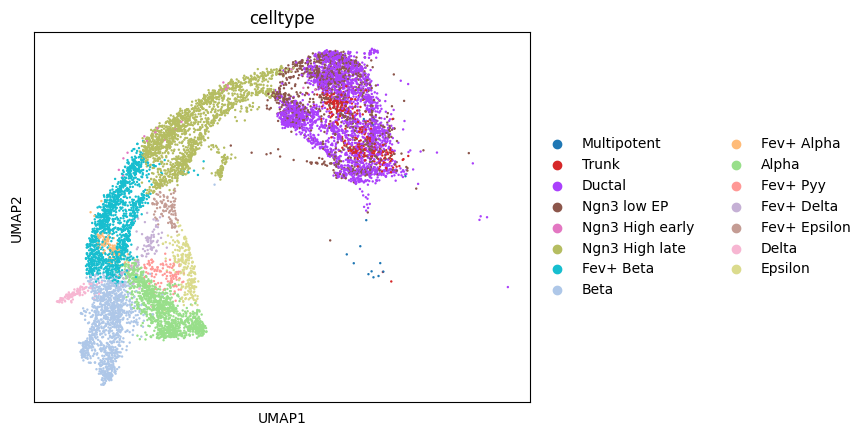

In [50]:
sc.pl.umap(adata_red, color='celltype')

In [59]:
tp0 = TemporalProblem(adata_red)
tp0 = tp0.prepare("day")

In [60]:
tp0 = tp0.solve(epsilon=1e-2, scale_cost="mean", max_iterations=1e4)

In [61]:
tp0[14.5, 15.5].solution.converged

True

In [62]:
tm = tp0.cell_transition(start=14.5, end=15.5, early_annotation="celltype", late_annotation="celltype", forward=True)

/home/icb/dominik.klein/miniconda3/envs/jax_gpu2/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


In [63]:
import moscot.plotting as mpl

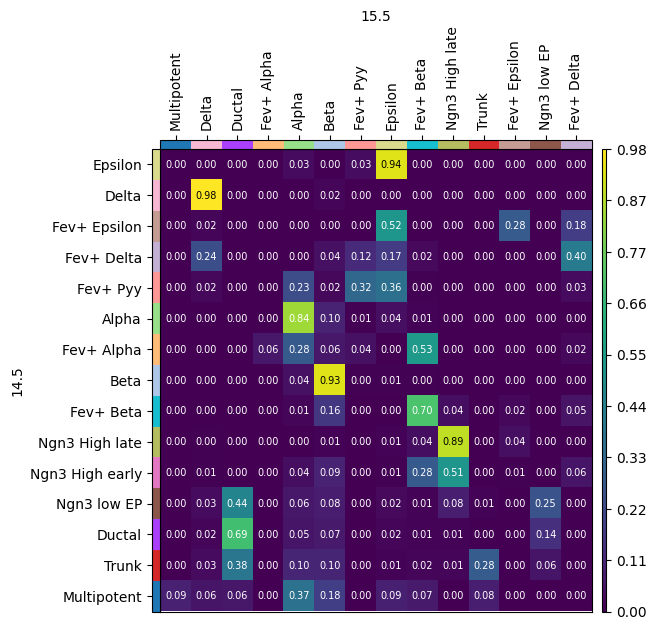

In [64]:
mpl.cell_transition(tp0, dpi=100, fontsize=7)

In [65]:
transition_matrix = tp0.cell_transition(14.5, 15.5, early_annotation="celltype", late_annotation="celltype", forward=False)

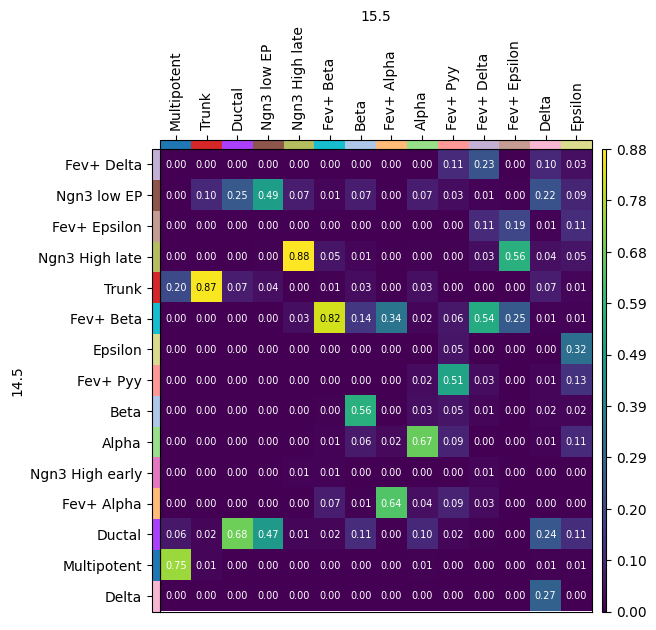

In [66]:
mpl.cell_transition(tp0, dpi=100, fontsize=7)